In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:
data_1=pd.read_csv('Data/summer_movie_genres.csv')
data_2=pd.read_csv('Data/summer_movies.csv')

In [128]:
data_1.head()

,tconst,genres
0,tt0011462,Drama
1,tt0026714,Comedy
2,tt0026714,Fantasy
3,tt0026714,Romance
4,tt0033864,Comedy


In [129]:
data_2.head()

,tconst,title_type,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes
0,tt0011462,movie,Midsummer Madness,Midsummer Madness,1920.0,60.0,Drama,midsummer madness,7.4,19
1,tt0026714,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931
2,tt0033864,movie,The Teachers on Summer Vacation,Magistrarna på sommarlov,1941.0,86.0,Comedy,the teachers on summer vacation,5.5,78
3,tt0037325,movie,Summer Storm,Summer Storm,1944.0,106.0,"Crime,Drama,Film-Noir",summer storm,6.6,688
4,tt0038406,movie,Centennial Summer,Centennial Summer,1946.0,102.0,"History,Music,Romance",centennial summer,6.1,431


In [130]:
data=data_1.merge(data_2,
                  left_on='tconst',
                  right_on='tconst')

In [131]:
data.head()

,tconst,genres_x,title_type,primary_title,original_title,year,runtime_minutes,genres_y,simple_title,average_rating,num_votes
0,tt0011462,Drama,movie,Midsummer Madness,Midsummer Madness,1920.0,60.0,Drama,midsummer madness,7.4,19
1,tt0026714,Comedy,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931
2,tt0026714,Fantasy,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931
3,tt0026714,Romance,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931
4,tt0033864,Comedy,movie,The Teachers on Summer Vacation,Magistrarna på sommarlov,1941.0,86.0,Comedy,the teachers on summer vacation,5.5,78


In [132]:
data = data.drop('genres_y', axis=1)


In [133]:
data = data.rename(columns={'genres_x': 'genres'})

In [134]:
data

,tconst,genres,title_type,primary_title,original_title,year,runtime_minutes,simple_title,average_rating,num_votes
0,tt0011462,Drama,movie,Midsummer Madness,Midsummer Madness,1920.0,60.0,midsummer madness,7.4,19
1,tt0026714,Comedy,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,a midsummer nights dream,6.8,3931
2,tt0026714,Fantasy,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,a midsummer nights dream,6.8,3931
3,tt0026714,Romance,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,a midsummer nights dream,6.8,3931
4,tt0033864,Comedy,movie,The Teachers on Summer Vacation,Magistrarna på sommarlov,1941.0,86.0,the teachers on summer vacation,5.5,78
...,...,...,...,...,...,...,...,...,...,...
1580,tt9716208,Drama,movie,Summer of Mesa,Summer of Mesa,2020.0,76.0,summer of mesa,5.5,114
1581,tt9716208,Romance,movie,Summer of Mesa,Summer of Mesa,2020.0,76.0,summer of mesa,5.5,114
1582,tt9842874,Comedy,movie,Nothing Left - Just That Summer,Ein wilder Sommer - Die Wachausaga,2018.0,154.0,nothing left just that summer,4.4,15
1583,tt9842874,Drama,movie,Nothing Left - Just That Summer,Ein wilder Sommer - Die Wachausaga,2018.0,154.0,nothing left just that summer,4.4,15


In [135]:
data.isnull().sum()

tconst              0
genres             18
title_type          0
primary_title       0
original_title      0
year                1
runtime_minutes    72
simple_title        0
average_rating      0
num_votes           0
dtype: int64

In [136]:
data.columns

Index(['tconst', 'genres', 'title_type', 'primary_title', 'original_title',
       'year', 'runtime_minutes', 'simple_title', 'average_rating',
       'num_votes'],
      dtype='object')

In [137]:
df= data[[ 'title_type','genres', 'runtime_minutes','average_rating','num_votes']]
df

,title_type,genres,runtime_minutes,average_rating,num_votes
0,movie,Drama,60.0,7.4,19
1,movie,Comedy,133.0,6.8,3931
2,movie,Fantasy,133.0,6.8,3931
3,movie,Romance,133.0,6.8,3931
4,movie,Comedy,86.0,5.5,78
...,...,...,...,...,...
1580,movie,Drama,76.0,5.5,114
1581,movie,Romance,76.0,5.5,114
1582,movie,Comedy,154.0,4.4,15
1583,movie,Drama,154.0,4.4,15


In [138]:
type=df['title_type'].value_counts(normalize=True)
type

movie      0.791798
tvMovie    0.150158
video      0.058044
Name: title_type, dtype: float64

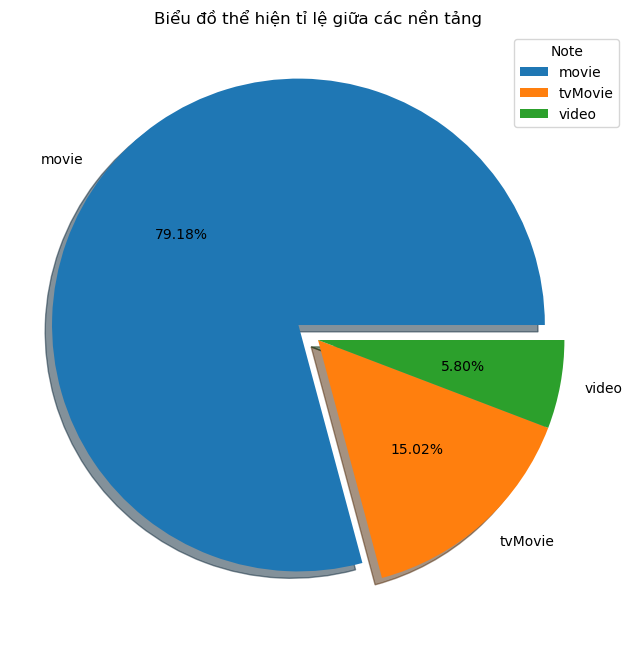

In [139]:
plt.figure(figsize=(10,8))
plt.pie(type.values,labels=type.index,autopct='%.2f%%',explode=(0.1,0,0),shadow=True)
plt.legend(title='Note')
plt.title('Biểu đồ thể hiện tỉ lệ giữa các nền tảng')
plt.show()


# Nhận xét:
Qua biểu đồ tỉ lệ giữa các nền tảng ta thấy đại đa số mọi người sẽ đi xem chiếu rạp nhiều hơn chiếm khoảng 79%

In [140]:
the_loai=df['genres'].value_counts()
the_loai

Drama          489
Comedy         274
Romance        190
Documentary     98
Family          70
Horror          48
Music           48
Thriller        36
Crime           33
Mystery         33
Adventure       32
Animation       30
Fantasy         30
Action          29
Sport           26
Short           18
Musical         17
History         17
Biography       17
War             15
Sci-Fi          10
Western          3
Film-Noir        2
Reality-TV       1
Talk-Show        1
Name: genres, dtype: int64

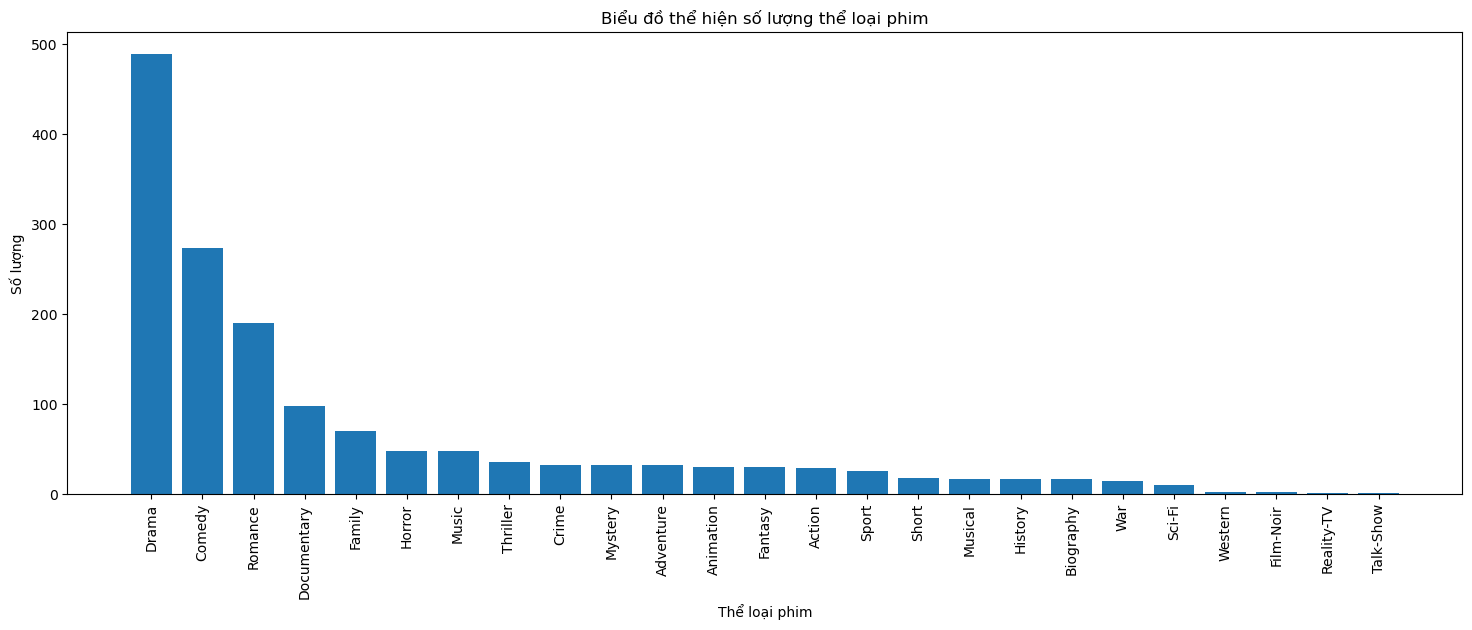

In [141]:
plt.figure(figsize=(18,6))
plt.bar(the_loai.index,the_loai.values)
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện số lượng thể loại phim')
plt.xlabel('Thể loại phim')
plt.ylabel('Số lượng')
plt.show()

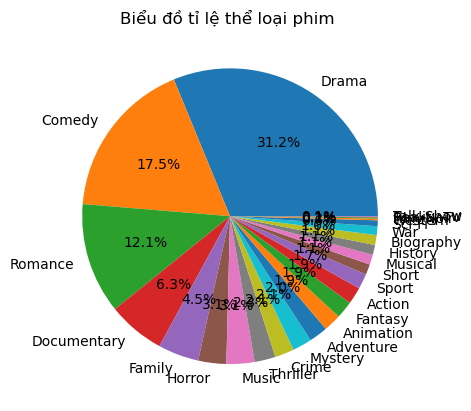

In [142]:

plt.pie(the_loai.values,labels=the_loai.index,autopct='%.1f%%')
plt.title('Biểu đồ tỉ lệ thể loại phim ')
plt.show()

# Nhận xét:
Qua 2 biểu đồ về thể loại phim ta thấy tập trung chủ yếu vào Drama(31.2),Comedy(17.5%),Romance(12.1%),Documentary(6.3%)

In [143]:
df.head()

,title_type,genres,runtime_minutes,average_rating,num_votes
0,movie,Drama,60.0,7.4,19
1,movie,Comedy,133.0,6.8,3931
2,movie,Fantasy,133.0,6.8,3931
3,movie,Romance,133.0,6.8,3931
4,movie,Comedy,86.0,5.5,78


In [144]:
thoi_luong=df['runtime_minutes'].value_counts()
thoi_luong

90.0     105
95.0      62
98.0      59
80.0      58
85.0      58
        ... 
48.0       1
171.0      1
232.0      1
188.0      1
141.0      1
Name: runtime_minutes, Length: 119, dtype: int64

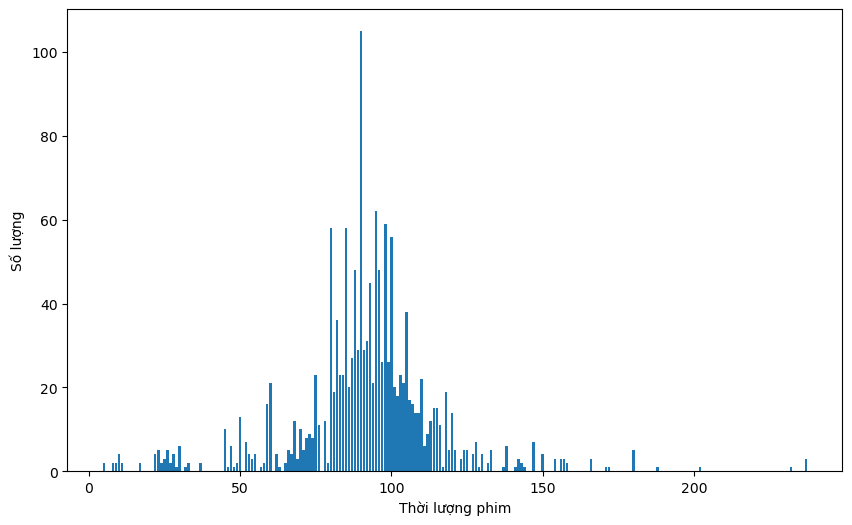

In [145]:
plt.figure(figsize=(10,6))
plt.bar(thoi_luong.index,thoi_luong.values)
plt.xlabel('Thời lượng phim')
plt.ylabel('Số lượng')
plt.show()

# Nhận xét:
Từ biểu đồ có thể thấy được thời lượng bộ phim được xem nhiều nhất từ 80-100 phút, cao nhất năm trong khoảng 90 phút

In [146]:
df.head()

,title_type,genres,runtime_minutes,average_rating,num_votes
0,movie,Drama,60.0,7.4,19
1,movie,Comedy,133.0,6.8,3931
2,movie,Fantasy,133.0,6.8,3931
3,movie,Romance,133.0,6.8,3931
4,movie,Comedy,86.0,5.5,78


In [147]:
diem_tb=df['average_rating'].value_counts()
diem_tb

6.4    78
7.1    62
6.3    59
6.1    57
6.2    57
       ..
2.5     2
9.4     2
9.0     2
8.8     1
9.2     1
Name: average_rating, Length: 70, dtype: int64

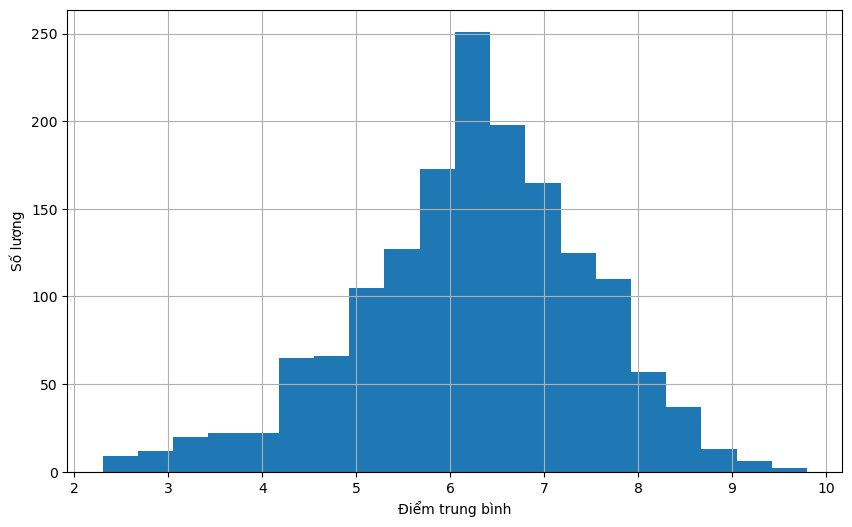

In [148]:
plt.figure(figsize=(10,6))
df['average_rating'].hist(bins=20)
plt.xlabel('Điểm trung bình')
plt.ylabel('Số lượng')
plt.show()

# Nhận xét:
Từ biểu đồ ta thấy điểm trung bình của các bộ phim tập trung chủ yếu từ 5 điểm đến 8 điểm , rất hiếm bộ phim được 10 điểm.

In [149]:
df.head()

,title_type,genres,runtime_minutes,average_rating,num_votes
0,movie,Drama,60.0,7.4,19
1,movie,Comedy,133.0,6.8,3931
2,movie,Fantasy,133.0,6.8,3931
3,movie,Romance,133.0,6.8,3931
4,movie,Comedy,86.0,5.5,78


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 0 to 1584
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_type       1585 non-null   object 
 1   genres           1567 non-null   object 
 2   runtime_minutes  1513 non-null   float64
 3   average_rating   1585 non-null   float64
 4   num_votes        1585 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 74.3+ KB


In [151]:
import seaborn as sns

         genres  num_votes
7         Drama    1293789
17      Romance    1183107
4        Comedy    1179523
15      Mystery     338922
12       Horror     324010
1     Adventure     226864
22     Thriller     178680
2     Animation     130285
5         Crime      99971
8        Family      56432
9       Fantasy      44167
0        Action      42669
6   Documentary      35606
13        Music      27218
11      History      19922
14      Musical      18584
20        Sport      15151
23          War      14495
3     Biography      11836
18       Sci-Fi       4309
19        Short       1382
10    Film-Noir       1124
24      Western        662
16   Reality-TV         16
21    Talk-Show         16


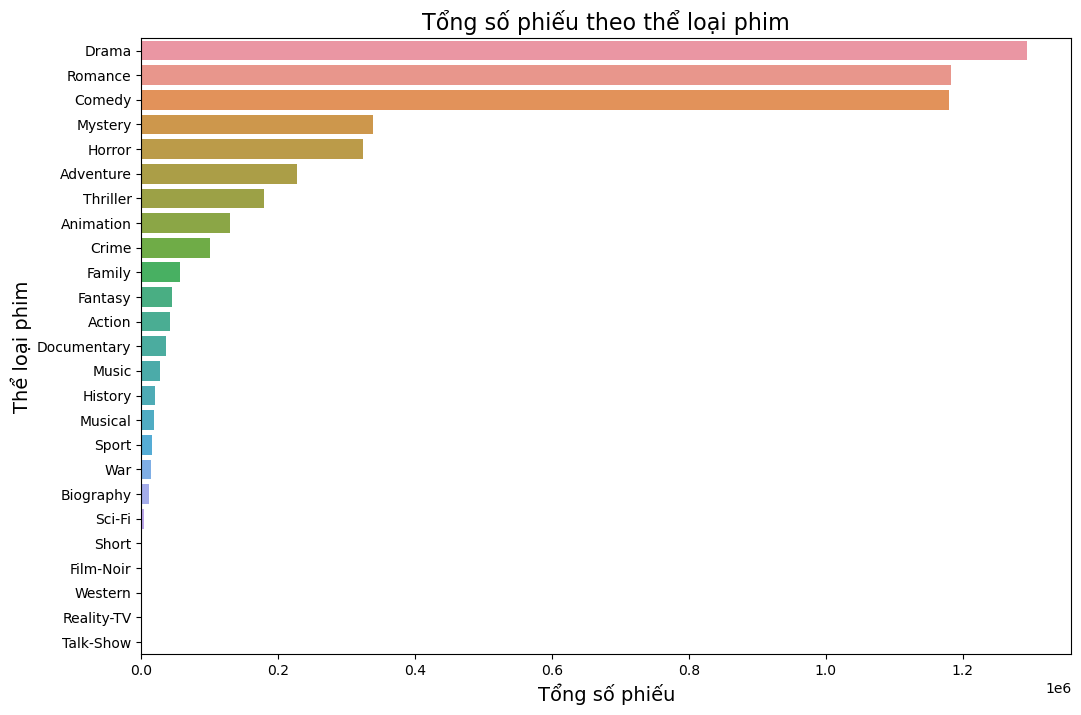

In [161]:
df_clean = df.dropna(subset=['genres', 'num_votes'])

genre_votes = df_clean.groupby('genres')['num_votes'].sum().reset_index()

# Sắp xếp theo số lượng phiếu để dễ quan sát
genre_votes = genre_votes.sort_values(by='num_votes', ascending=False)
print(genre_votes)
# Vẽ biểu đồ thanh
plt.figure(figsize=(12,8))
sns.barplot(x='num_votes', y='genres', data=genre_votes)

# Thêm tiêu đề và nhãn cho trục
plt.title('Tổng số phiếu theo thể loại phim', fontsize=16)
plt.xlabel('Tổng số phiếu', fontsize=14)
plt.ylabel('Thể loại phim', fontsize=14)

# Hiển thị biểu đồ
plt.show()

 số lượng bình chọn cho Drama là cao nhất tiếp theo là Romance và Comedy

In [153]:
df.head()

,title_type,genres,runtime_minutes,average_rating,num_votes
0,movie,Drama,60.0,7.4,19
1,movie,Comedy,133.0,6.8,3931
2,movie,Fantasy,133.0,6.8,3931
3,movie,Romance,133.0,6.8,3931
4,movie,Comedy,86.0,5.5,78


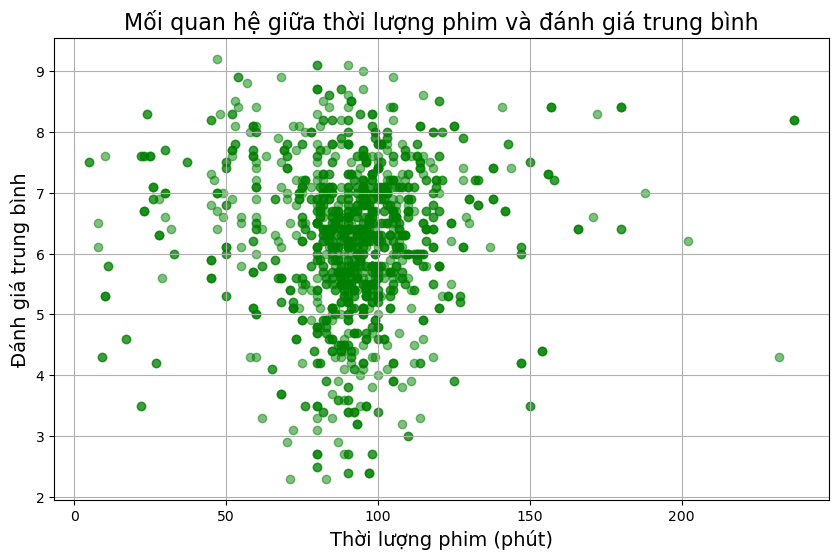

In [154]:
df_clean = df.dropna(subset=['runtime_minutes', 'average_rating'])

# Vẽ biểu đồ scatter plot giữa 'runtime_minutes' và 'average_rating'
plt.figure(figsize=(10,6))
plt.scatter(df_clean['runtime_minutes'], df_clean['average_rating'], color='g', alpha=0.5)
plt.title('Mối quan hệ giữa thời lượng phim và đánh giá trung bình', fontsize=16)
plt.xlabel('Thời lượng phim (phút)', fontsize=14)
plt.ylabel('Đánh giá trung bình', fontsize=14)
plt.grid(True)
plt.show()

Từ biểu đồ có thể thấy thời lượng phim từ khoảng 80-110 phút được đánh giá chủ yếu trong khoảng từ 5-8 điểm 

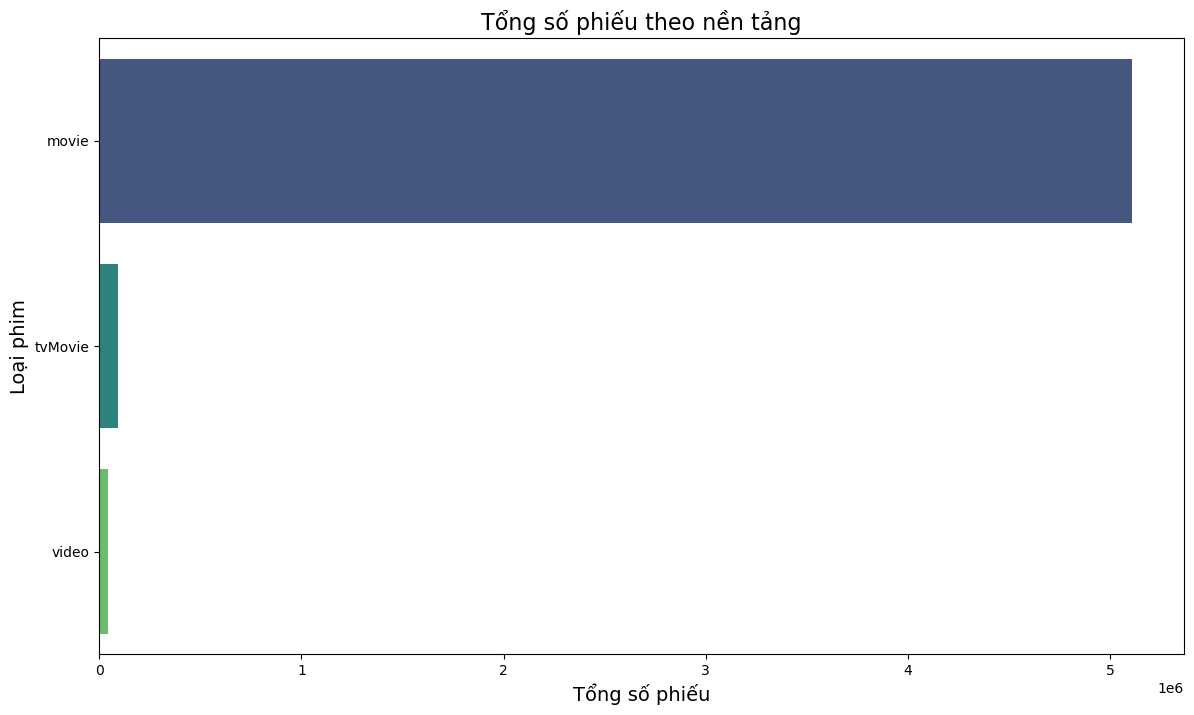

In [155]:
df_clean = df.dropna(subset=['title_type', 'num_votes'])

# Nhóm theo loại phim và tính tổng số phiếu
title_votes = df_clean.groupby('title_type')['num_votes'].sum().reset_index()

# Sắp xếp theo tổng số phiếu để dễ quan sát
title_votes = title_votes.sort_values(by='num_votes', ascending=False)

# Vẽ biểu đồ thanh
plt.figure(figsize=(14,8))
sns.barplot(x='num_votes', y='title_type', data=title_votes, palette='viridis')

# Thêm tiêu đề và nhãn cho trục
plt.title('Tổng số phiếu theo nền tảng', fontsize=16)
plt.xlabel('Tổng số phiếu', fontsize=14)
plt.ylabel('Loại phim', fontsize=14)
# Hiển thị biểu đồ
plt.show()

Từ biểu đồ có thể thấy số lượng phiếu bình chọn của Movie là rất lớn

In [156]:
df.head()

,title_type,genres,runtime_minutes,average_rating,num_votes
0,movie,Drama,60.0,7.4,19
1,movie,Comedy,133.0,6.8,3931
2,movie,Fantasy,133.0,6.8,3931
3,movie,Romance,133.0,6.8,3931
4,movie,Comedy,86.0,5.5,78


In [157]:
print(genre_votes)

         genres  num_votes
7         Drama    1293789
17      Romance    1183107
4        Comedy    1179523
15      Mystery     338922
12       Horror     324010
1     Adventure     226864
22     Thriller     178680
2     Animation     130285
5         Crime      99971
8        Family      56432
9       Fantasy      44167
0        Action      42669
6   Documentary      35606
13        Music      27218
11      History      19922
14      Musical      18584
20        Sport      15151
23          War      14495
3     Biography      11836
18       Sci-Fi       4309
19        Short       1382
10    Film-Noir       1124
24      Western        662
16   Reality-TV         16
21    Talk-Show         16


In [158]:
genre_votes[genre_votes['genres']=='Drama']

,genres,num_votes
7,Drama,1293789


  title_type  average_rating
1    tvMovie        6.594118
2      video        6.327174
0      movie        6.178088


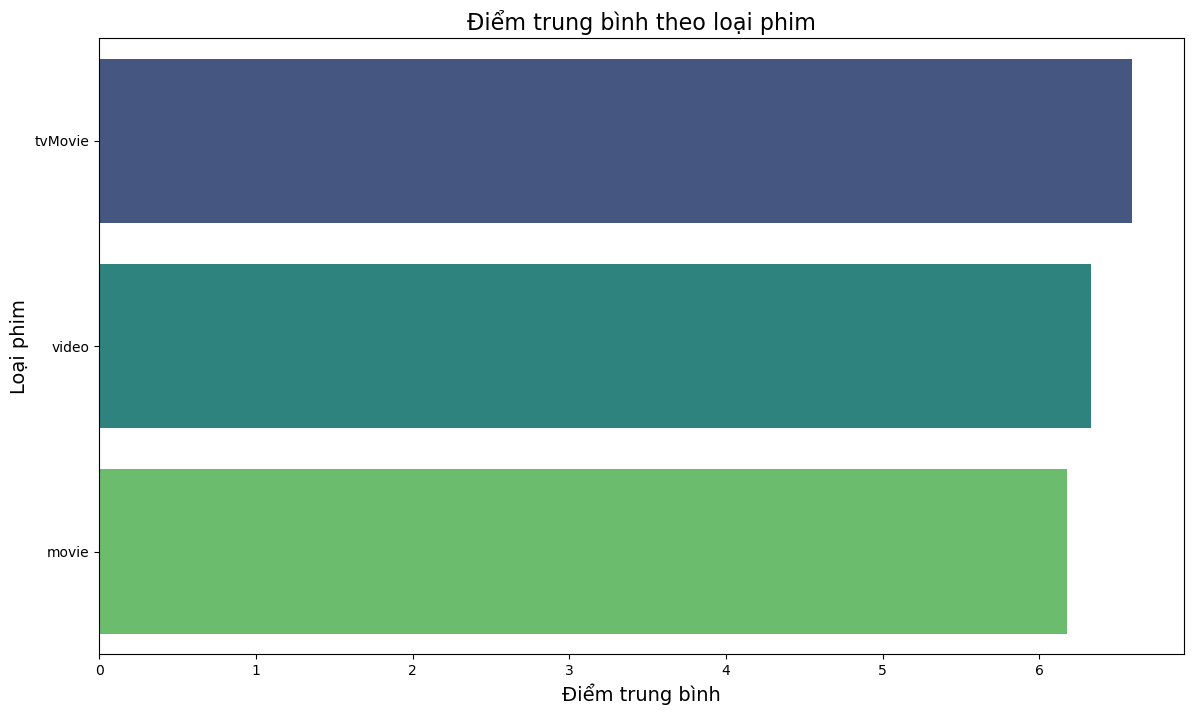

In [159]:
df_clean = df.dropna(subset=['title_type', 'average_rating'])

# Nhóm theo loại phim và tính điểm trung bình
title_avg_rating = df_clean.groupby('title_type')['average_rating'].mean().reset_index()

# Sắp xếp theo điểm trung bình để dễ quan sát
title_avg_rating = title_avg_rating.sort_values(by='average_rating', ascending=False)

# In ra kết quả điểm trung bình theo loại phim
print(title_avg_rating)

# Vẽ biểu đồ thanh để trực quan hóa dữ liệu
plt.figure(figsize=(14,8))
sns.barplot(x='average_rating', y='title_type', data=title_avg_rating, palette='viridis')

# Thêm tiêu đề và nhãn cho trục
plt.title('Điểm trung bình theo loại phim', fontsize=16)
plt.xlabel('Điểm trung bình', fontsize=14)
plt.ylabel('Loại phim', fontsize=14)

# Hiển thị biểu đồ
plt.show()

In [164]:
genre_votes

,genres,num_votes
7,Drama,1293789
17,Romance,1183107
4,Comedy,1179523
15,Mystery,338922
12,Horror,324010
1,Adventure,226864
22,Thriller,178680
2,Animation,130285
5,Crime,99971
8,Family,56432


# TỔNG KẾT:
* Phim movies thể loại Dram được phát hàng rất nhiều.
* Điểm trung bình tập trung chủ yếu ở khoảng 5-8 điểm.
* Tổng số votes của movie là cao nhất.
* Mặc dù Movies được phát hành nhiều nhưng điểm trung bình của movie là thấp nhất, cao hơn là video và cao nhất là tvmovie.
* Thời lượng phim chủ yêu là từ 80-110 phút.
* Thể loại phim Drama được phát hành khá nhiều khoảng 31.2% .
* Số lượng bình chọn cho thể loại phim Drama,Romance,Comedy cao nhất với con số cực kì áp đảo 1293789,1183107,1179523 trên tổng số  5248740 lượt bình chọn.